# Download essential datasets and packages

In [41]:
!wget https://www.dropbox.com/s/c1pzdacnzhvi6pm/histos_tba.20.npz

--2020-03-28 12:23:05--  https://www.dropbox.com/s/c1pzdacnzhvi6pm/histos_tba.20.npz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c1pzdacnzhvi6pm/histos_tba.20.npz [following]
--2020-03-28 12:23:05--  https://www.dropbox.com/s/raw/c1pzdacnzhvi6pm/histos_tba.20.npz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc89096f105cabd7dd89a619c784.dl.dropboxusercontent.com/cd/0/inline/A0xBcwddbTaM1o3m5aONQ1aP_kpWqq4ckcGT-jwWvwjBpEIReHt7vzjx1VkAO16X-GZyf9UYvIds9GPuprgIDJNjkLLE7kmMGBOahqPkaRxBg-oMzadhCSto6vdLBqTYwks/file# [following]
--2020-03-28 12:23:06--  https://uc89096f105cabd7dd89a619c784.dl.dropboxusercontent.com/cd/0/inline/A0xBcwddbTaM1o3m5aONQ1aP_kpWqq4ckcGT-jwWvwjBpEIReHt7vzjx1VkAO16X-GZyf9UYvIds9GPuprgIDJNjkLLE7kmMGBO

Python module dependencies

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
from scipy import stats
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import re 
from sklearn.preprocessing import OneHotEncoder

# Load data

In [0]:
data = np.load('histos_tba.20.npz')
variables = data['variables']
parameters = data['parameters']

# Exploratory Data Analysis

In [0]:
assert len(parameters) == len(variables)

In [0]:
parameters[0]

array([-0.4456128,  1.4571882,  2.0295827], dtype=float32)

In [0]:
parameters.shape

(3272341, 3)

In [0]:
len(variables)

3272341

In [0]:
variables[0]

array([3.190000e+03,          nan, 3.546000e+03, 3.568000e+03,
                nan,          nan,          nan, 3.568000e+03,
                nan, 3.127000e+03, 3.524000e+03, 3.074000e+03,
       2.000000e+01,          nan, 1.700000e+01, 1.600000e+01,
                nan,          nan,          nan, 2.000000e+01,
                nan, 2.200000e+01, 1.900000e+01, 2.200000e+01,
       2.215171e+01,          nan, 1.000000e+00, 0.000000e+00,
                nan,          nan,          nan, 0.000000e+00,
                nan, 3.000000e+00, 1.000000e+00, 1.700000e+01,
       0.000000e+00,          nan, 0.000000e+00, 0.000000e+00,
                nan,          nan,          nan, 0.000000e+00,
                nan, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       4.000000e+00,          nan, 1.000000e+00, 1.000000e+00,
                nan,          nan,          nan, 1.000000e+00,
                nan, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00,          nan, 1.000000e+00, 0.0000

In [0]:
variables[0].shape

(87,)

In [0]:
phi_coordinate = variables[:,0:11]
theta_coordinate = variables[:,12:23]
bending_angle = variables[:,24:35]
time_info = variables[:,36:47]
ring_number = variables[:,48:59]
front_rear_hit = variables[:,60:71]
mask = variables[:,72:83]

In [0]:
stats.describe(mask[0])

DescribeResult(nobs=11, minmax=(0.0, 1.0), mean=0.45454547, variance=0.27272728, skewness=0.18257398903369904, kurtosis=-1.9666667257828871)

In [0]:
stats.describe(mask)

DescribeResult(nobs=3272341, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)), mean=array([0.29684132, 0.7339318 , 0.14751641, 0.2036487 , 0.254398  ,
       0.81620467, 0.83358794, 0.17264612, 0.26716104, 0.5346659 ,
       0.39980704], dtype=float32), variance=array([0.207707  , 0.19251165, 0.12718007, 0.15815058, 0.18953134,
       0.14768834, 0.14036351, 0.14436828, 0.19300447, 0.24737366,
       0.24808513], dtype=float32), skewness=array([ 0.8756965 , -1.084038  ,  2.0077703 ,  1.4971598 ,  1.119635  ,
       -1.7144614 , -1.7955006 ,  1.7317959 ,  1.0795355 , -0.13678463,
        0.39841577], dtype=float32), kurtosis=array([-1.2367492 , -0.8346834 ,  1.8372841 ,  0.29170346, -0.7354202 ,
        0.7235465 ,  1.0909162 ,  0.8852196 , -0.896029  , -1.9870636 ,
       -1.896924  ], dtype=float32))

In [0]:
theta_coordinate[0]

array([20., nan, 17., 16., nan, nan, nan, 20., nan, 22., 19.],
      dtype=float32)

In [0]:
phi_coordinate[0]

array([3190.,   nan, 3546., 3568.,   nan,   nan,   nan, 3568.,   nan,
       3127., 3524.], dtype=float32)

In [0]:
parameters[:,0]

array([-0.4456128 ,  0.35296607, -0.16274202, ...,  0.06879503,
       -0.00109554,  0.41426006], dtype=float32)

In [0]:
para = np.delete(parameters, 1, 1)

In [0]:
para = np.delete(para, 1, 1)

In [0]:
para.shape

(3272341, 1)

In [0]:
momentum = -1 / para

In [0]:
momentum

array([[  2.2441008],
       [ -2.8331335],
       [  6.144695 ],
       ...,
       [-14.535934 ],
       [912.7884   ],
       [ -2.4139426]], dtype=float32)

In [0]:
tot = 0
for e in momentum:
  if e > 100:
    tot += 1
tot

37070

# Data Preparation

In [0]:
variables.shape

(3272341, 87)

In [0]:
variables = variables[:,:84]

In [0]:
variables.T[83].shape

(3272341,)

parameter array 0th index contains charge/momentum, to get the momentum we have to get the negative reciprocal of the charge / momentum

In [44]:
transverse_momentum = -1 / np.delete(parameters, [1,2], 1) 
stats.describe(transverse_momentum)

DescribeResult(nobs=3272341, minmax=(array([-6989.3447], dtype=float32), array([6989.252], dtype=float32)), mean=array([0.03644617], dtype=float32), variance=array([16305.736], dtype=float32), skewness=array([-0.50260574], dtype=float32), kurtosis=array([991.76306], dtype=float32))

In [0]:
dataset = np.hstack((variables,transverse_momentum))

In [0]:
def find_total_events_for_range(selection):
  if selection == 1:
    tot = 0
    for e in dataset[:,84]:
      if e > 0 and e <= 10:
        tot += 1
    return tot
  elif selection == 2:
    tot = 0
    for e in dataset[:,84]:
      if e > 10 and e <= 30:
        tot += 1
    return tot
  elif selection == 3:
    tot = 0
    for e in dataset[:,84]:
      if e > 30 and e <= 100:
        tot += 1
    return tot
  elif selection == 4:
    tot = 0
    for e in dataset[:,84]:
      if e > 100:
        tot += 1
    return tot

print(find_total_events_for_range(1)) # between 0 and 10
print(find_total_events_for_range(2)) # between 10 and 30
print(find_total_events_for_range(3)) # between 00 and 100
print(find_total_events_for_range(4)) # above 100

1263726
249098
87436
37070


In the below cell, we will be looing at the transpose of the matrix to see the statistics of the momentum coloumn only

In [0]:
stats.describe(dataset.T[84])

DescribeResult(nobs=3272341, minmax=(-6989.3447, 6989.252), mean=0.036446173, variance=16305.736, skewness=-0.5026057362556458, kurtosis=991.7630857361447)

The dataset is highly imbalanced considering the 4 momentum ranges. Here is a result from analysis of the data.

1. 0 - 10 = 1 200 K 
2. 10 - 30 = 249 K
3. 30 - 100 = 87 K
4. above 100 = 37 K

Hence we will be needing to make the classes of data of the same size. We will be undersampling the data.


In [0]:
cleaned_dataset = []
for e in dataset:
  if e[84] > 0.0 and e[84] <= 10.0:
    e[84] = 1
    cleaned_dataset.append(e)
  elif e[84] > 10.0 and e[84] <= 30.0:
    e[84] = 2
    cleaned_dataset.append(e)
  elif e[84] > 30.0 and e[84] <= 100.0:
    e[84] = 3
    cleaned_dataset.append(e)
  elif e[84] > 100.0:
    e[84] = 4
    cleaned_dataset.append(e)

cleaned_dataset = np.asarray(cleaned_dataset)
cleaned_dataset

array([[3.190e+03,       nan, 3.546e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [      nan, 1.415e+03, 1.455e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [3.875e+03,       nan, 4.008e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.539e+03, 1.613e+03,       nan, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [3.541e+03,       nan, 3.672e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [      nan, 3.464e+03, 3.439e+03, ..., 1.000e+00, 1.000e+00,
        4.000e+00]], dtype=float32)

In [0]:
stats.describe(cleaned_dataset.T[84])

DescribeResult(nobs=1637330, minmax=(1.0, 4.0), mean=1.3268614, variance=0.46266946, skewness=2.230762243270874, kurtosis=4.542511793375344)

In [0]:
cleaned_dataset.shape

(1637330, 85)

In [0]:
X = cleaned_dataset[:,0:84]
X = np.nan_to_num(X)
y = cleaned_dataset[:,84]
y = y.astype(int)

# Downsampling data

In [0]:
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 1263726, 2: 249098, 3: 87436, 4: 37070})
Resampled dataset shape Counter({1: 37070, 2: 37070, 3: 37070, 4: 37070})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# OneHot Encode Data

In [0]:
# one hot encode
onehot_encoder = OneHotEncoder(sparse=False)
y_res = y_res.reshape(len(y_res), 1)
onehot_encoded_y = onehot_encoder.fit_transform(y_res)
onehot_encoded_y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

# Train Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_res, onehot_encoded_y, test_size=0.3, random_state=42)

# Fully Connected Neural Network

The parameters were made on looking at the euclidean data spread of the dataset.

In [0]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
#### PROGRESS BAR
class ProgressBar(object):
    DEFAULT = 'Progress: %(bar)s %(percent)3d%%'
    FULL = '%(bar)s %(current)d/%(total)d (%(percent)3d%%) %(remaining)d to go'

    def __init__(self, total, width=40, fmt=DEFAULT, symbol='=',
                 output=sys.stderr):
        assert len(symbol) == 1

        self.total = total
        self.width = width
        self.symbol = symbol
        self.output = output
        self.fmt = re.sub(r'(?P<name>%\(.+?\))d',
            r'\g<name>%dd' % len(str(total)), fmt)

        self.current = 0

    def __call__(self):
        percent = self.current / float(self.total)
        size = int(self.width * percent)
        remaining = self.total - self.current
        bar = '[' + self.symbol * size + ' ' * (self.width - size) + ']'

        args = {
            'total': self.total,
            'bar': bar,
            'current': self.current,
            'percent': percent * 100,
            'remaining': remaining
        }
        print('\r' + self.fmt % args, file=self.output, end='')

    def done(self):
        self.current = self.total
        self()
        print('', file=self.output)

In [0]:
# PlaceHolders
x = tf.placeholder(tf.float32,shape=[None,84])

# Variables
w1 = tf.Variable(tf.random_normal(shape=[84,256]))
b1 = tf.Variable(tf.random_normal(shape=[256]))

w2 = tf.Variable(tf.random_normal(shape=[256,50]))
b2 = tf.Variable(tf.random_normal(shape=[50]))

w3 = tf.Variable(tf.random_normal(shape=[50,4]))
b3 = tf.Variable(tf.random_normal(shape=[4]))

# Graph operations
x_X_w1 = tf.matmul(x,w1)
y_1 = tf.add(x_X_w1,b1)
y1_X_w2 = tf.matmul(y_1,w2)
y_2 = tf.add(y1_X_w2,b2)
y2_X_w3 = tf.matmul(y_2,w3)
y = tf.add(y2_X_w3,b3)


# Loss Function
yTrue = tf.placeholder(tf.float32,shape=[None,4])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=yTrue,logits=y))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train = optimizer.minimize(cross_entropy)

# Session start
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    steps = 1000
    progress = ProgressBar(steps, fmt=ProgressBar.FULL)
    # Train
    for step in range(1000):
        progress.current += 1
        progress()
        batchX, batchY = next_batch(10, X_train, y_train)

        sess.run(train,feed_dict={x:batchX,yTrue:batchY})
    progress.done()
    # Evaluation
    correctPred = tf.equal(tf.argmax(y,1) , tf.arg_max(yTrue,1))

    acc = tf.reduce_mean( tf.cast(correctPred,tf.float32) )

    print(sess.run(acc,feed_dict={x:X_test, yTrue:y_test}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



[======================================  ]  964/1000 ( 96%)   36 to go

0.24995504


[========================================] 1000/1000 (100%)    0 to go


# Decision Trees ( Extra experimentation )

In [0]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_trainDT, y_trainDT)

In [0]:
y_pred = clf.predict(X_testDT)
from sklearn.metrics import accuracy_score
accuracy_score(y_testDT, y_pred)

0.842147479941938

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testDT, y_pred)

array([[356496,  19508,   2200,    933],
       [ 18291,  43516,  10287,   2690],
       [  1755,  10023,  10370,   3931],
       [   874,   2723,   4322,   3280]])

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_testDT, y_pred, average=None,labels=np.unique(y_testDT))

(array([0.94457045, 0.57431701, 0.38154457, 0.3027506 ]),
 array([0.9402828 , 0.58188917, 0.39763795, 0.29288329]),
 array([0.94242175, 0.5780783 , 0.38942506, 0.29773522]),
 array([379137,  74784,  26079,  11199]))

# 1D Concolutional Neural Network

the kernel sizes were set based on the tensor input dimensions, we dont need many redundant feature maps. We also dont need feature maps that can't map bijectively between features and deep layers


In [0]:
X_trainCNN, X_testCNN, y_trainCNN, y_testCNN = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

array([1, 1, 1, ..., 4, 4, 4])

In [0]:
%matplotlib inline

Loading data...
103796 train sequences
44484 test sequences
Pad sequences (samples x time)
x_train shape: (103796, 84)
x_test shape: (44484, 84)
Build model...
Train on 103796 samples, validate on 44484 samples
Epoch 1/10
103796/103796 [==============================] - 16s 157us/step - loss: -23.8012 - acc: 0.2500 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 2/10
103796/103796 [==============================] - 15s 149us/step - loss: -23.9039 - acc: 0.2500 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 3/10
103796/103796 [==============================] - 15s 149us/step - loss: -23.9039 - acc: 0.2500 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 4/10
103796/103796 [==============================] - 15s 148us/step - loss: -23.9039 - acc: 0.2500 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 5/10
103796/103796 [==============================] - 15s 147us/step - loss: -23.9039 - acc: 0.2500 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 6/10
103796/103796 [==============================] - 15s 

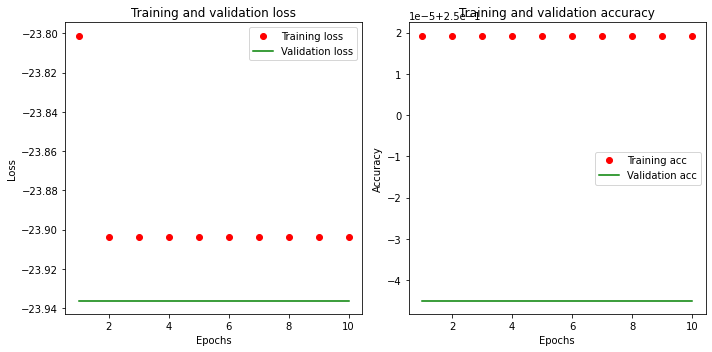

Train on 103796 samples, validate on 44484 samples
Epoch 1/3
103796/103796 [==============================] - 15s 140us/step - loss: -23.7546 - acc: 0.2499 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 2/3
103796/103796 [==============================] - 14s 132us/step - loss: -23.9039 - acc: 0.2500 - val_loss: -23.9362 - val_acc: 0.2500
Epoch 3/3
44484/44484 [==============================] - 2s 35us/step
Accuracy on test set: [-23.93615641086696, 0.2499550400143872]
Test loss: -23.93615641086696
Test accuracy: 0.2499550400143872
Predicted score:  0


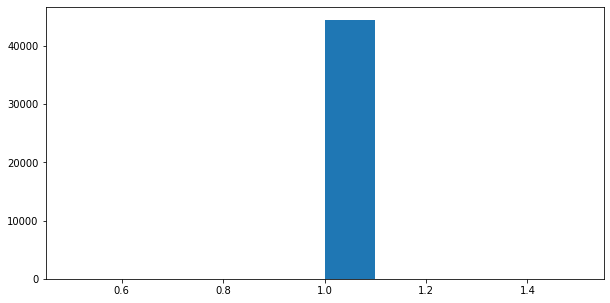

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils import plot_model
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#
# Get data
#
print('Loading data...')
x_train, y_train, x_test, y_test = X_trainCNN, y_trainCNN, X_testCNN, y_testCNN 
test_data = x_test
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
#print(x_train[450])

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(sequences=x_train, maxlen=84)
x_test = sequence.pad_sequences(sequences=x_test, maxlen=84)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Build model...')
model = Sequential()
#
# prepeare model
#
model.add(Embedding(input_dim=10000, output_dim=100, input_length=84))
model.add(Dropout(0.5))
model.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])              
#model.summary()
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))
#
# Training
#
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
history_dict = history.history
history_dict.keys()
#
# evaluation
#
results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
#
# Plot
#
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
#
# PREDICTION
#
model_prediction = Sequential()
model_prediction.add(Embedding(10000, 50, input_length=84))
model_prediction.add(Dropout(0.5))
model_prediction.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model_prediction.add(GlobalMaxPooling1D())
model_prediction.add(Dense(250))
model_prediction.add(Activation('relu'))
model_prediction.add(Dense(1))
model_prediction.add(Activation('sigmoid'))
model_prediction.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
#
# training
#
history = model_prediction.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test))
#
# Evaluation
#
results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
#
# Plot
#
plt.hist(model_prediction.predict(x_test))
#
# Prediction
#
y_pred = model_prediction.predict(x_test)
prediction_is_positive = y_pred > 0.5
label_is_negative = y_test.reshape((44484,1)) == 0

incorrect_cases = np.where(np.logical_and( prediction_is_positive  , label_is_negative ))[0]
#print ("All incorrect cases: ",incorrect_cases[0:])
print ("Predicted score: ", len(incorrect_cases))

# Regression on Momentum

In [0]:
X_reg = variables
y_reg = transverse_momentum

In [0]:
from sklearn.model_selection import train_test_split
X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Model

NN_model = Sequential()
print(X_trainReg.shape[1])
# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_trainReg.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

84
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               10880     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 175,745
Trainable params: 175,745
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(X_trainReg, y_trainReg, epochs=3, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 1832510 samples, validate on 458128 samples
Epoch 1/3
1832510/1832510 [==============================] - 194s 106us/step - loss: 18.4241 - mean_absolute_error: 18.4241 - val_loss: 18.2863 - val_mean_absolute_error: 18.2863

Epoch 00001: val_loss improved from inf to 18.28628, saving model to Weights-001--18.28628.hdf5
Epoch 2/3
1832510/1832510 [==============================] - 192s 105us/step - loss: 18.4239 - mean_absolute_error: 18.4239 - val_loss: 18.2858 - val_mean_absolute_error: 18.2858

Epoch 00002: val_loss improved from 18.28628 to 18.28582, saving model to Weights-002--18.28582.hdf5
Epoch 3/3
1832510/1832510 [==============================] - 183s 100us/step - loss: 18.4238 - mean_absolute_error: 18.4238 - val_loss: 18.2854 - val_mean_absolute_error: 18.2854

Epoch 00003: val_loss improved from 18.28582 to 18.28536, saving model to Weights-003--18.28536.hdf5


In [0]:
wights_file = 'Weights-003--18.28536.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
predictions = NN_model.predict(X_testReg)
predictions

array([[0.5903098],
       [0.5903098],
       [0.5903098],
       ...,
       [0.5903098],
       [0.5903098],
       [0.5903098]], dtype=float32)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

# Model

# Get the mean absolute error on the validation data
XGBModel = XGBRegressor()
XGBModel.fit(X_trainReg,y_trainReg , verbose=True)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_testReg)
MAE = mean_absolute_error(y_testReg , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[12:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  14.818793
